In [ ]:
# Import necessary libraries

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# connect to SQLite database

In [7]:
db_path = 'pharm_data.db'
conn = sql.connect(db_path)

In [ ]:
# Query the table to retrive Longitude, Latitude and sales data and create Pandas DataFrame

In [9]:
query = """ 
SELECT 
    Latitude AS Purchase_Latitude,
    Longitude AS Purchase_Longitude,
    Sales AS Transaction_Amount,
    City
FROM Pharm_Sales
WHERE Transaction_Amount > 0; 
"""
df = pd.read_sql_query(query, conn)


In [ ]:
# Create Geopandas DataFrame

In [13]:
geometry = [Point(xy) for xy in zip(df['Purchase_Longitude'], df['Purchase_Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry = geometry)

In [15]:
print(gdf.head(2))

   Purchase_Latitude  Purchase_Longitude  Transaction_Amount     City  \
0            51.2333             22.5667              1472.0   Lublin   
1            53.4167             18.4333              4137.0  ?wiecie   

                    geometry  
0  POINT (22.56670 51.23330)  
1  POINT (18.43330 53.41670)  


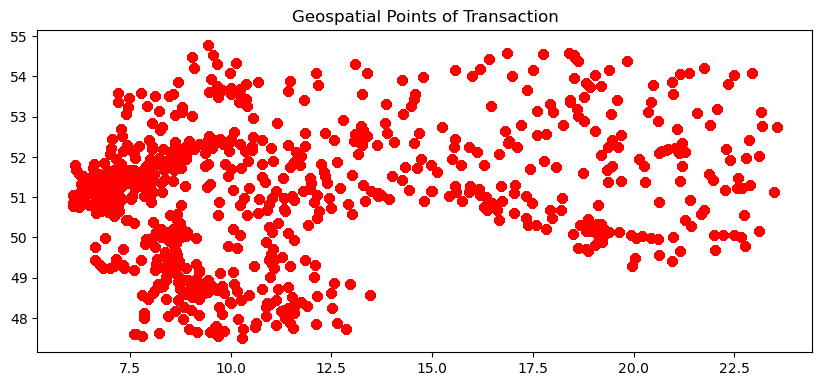

In [19]:
gdf.plot(color='red', figsize = (10, 8))
plt.title('Geospatial Points of Transaction')
plt.show()

In [ ]:
# This image shows a scatter plot titled "Geospatial Points of Transaction", with latitude and longitude data likely representing locations of transactions. Here's an analysis of the plot:

# Clustered Transactions:There are dense clusters of red points, particularly between longitude 7.5 and 10.0. This could indicate areas with higher transaction frequency, possibly urban or highly populated regions.

#Spread of Data:The points are spread across longitudes 7.5 to 22.5 and latitudes 48 to 55. This range likely corresponds to a specific geographic region, possibly a country or a set of countries.

#Sparse Regions:There are less dense areas in the higher longitude range (e.g., 15.0 to 22.5). This may indicate rural or less active regions for transactions.

In [21]:
df_filtered = df[['Purchase_Longitude', 'Purchase_Latitude', 'Transaction_Amount']]

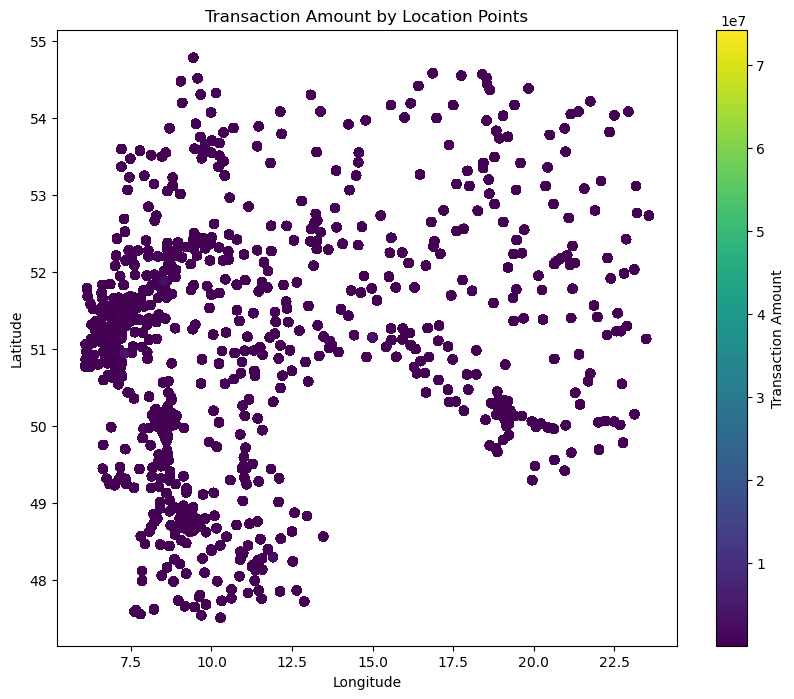

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df_filtered['Purchase_Longitude'],
    df_filtered['Purchase_Latitude'],
    c=df_filtered['Transaction_Amount'],
    cmap='viridis'
)
plt.colorbar(label='Transaction Amount')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Transaction Amount by Location Points')
plt.show()

In [ ]:
# This visualization represents transaction amounts by geospatial location. Here are key observations:

# 1. Color Gradient for Transaction Amounts:The color bar indicates transaction amounts, ranging from lower values (dark purple) to higher values (bright yellow).Regions with brighter colors have higher transaction amounts.

# 2. High-Transaction Areas:Most of the high-value transactions are concentrated between longitude 7.5–10.0 and latitude 50–52.This suggests a significant cluster of economic or sales activity in this area.

# 3. Sparse High-Value Points:There are isolated points with high transaction amounts in regions with lower overall density, e.g., around longitude 20.0.These could represent key locations with high-value sales despite low activity.

#4. Correlation of Clusters with High Values: Dense clusters around longitude 7.5–10.0 tend to correspond to areas with higher transaction values. This correlation should be explored further to identify the reasons behind these concentrations.

#5. Actionable Insights: Market Analysis: Investigate why certain regions have higher transaction values and if similar conditions can be replicated elsewhere.

# Resource Allocation: Focus marketing or sales efforts in these high-performing regions.
# Outliers: Study isolated high-value points to understand unique characteristics of these areas.

In [ ]:
# Plot for interactive map titled Trabsaction Amounts by Location and conversion to HTML format

In [37]:
import plotly.express as px
import plotly.io as pio
df['City'] = df['City']  
fig = px.scatter_mapbox(
    df,
    lat='Purchase_Latitude',
    lon='Purchase_Longitude',
    size='Transaction_Amount',
    hover_name='City',
    hover_data={'Transaction_Amount': True},
    color='Transaction_Amount',
    color_continuous_scale=px.colors.sequential.Viridis,
    size_max=15,
    mapbox_style='carto-positron',  # Options: 'open-street-map', 'white-bg', etc.
    title='Interactive Map: Transaction Amounts by Location'
)

output_html = 'transaction_map.html'  # Output file name
pio.write_html(fig, file=output_html, auto_open=False)

print(f"Interactive map has been saved as '{output_html}'.")


Interactive map has been saved as 'transaction_map.html'.
